# 2.1 Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
data = pd.read_csv('Food_Delivery_Times(in).csv')
print(data.shape)
print(data.head())
print(data.info())
print(data.isnull().sum())

(1000, 9)
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type   
0       522         7.93   Windy           Low   Afternoon      Scooter  \
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         

Handling Missing Values - Using Imputation

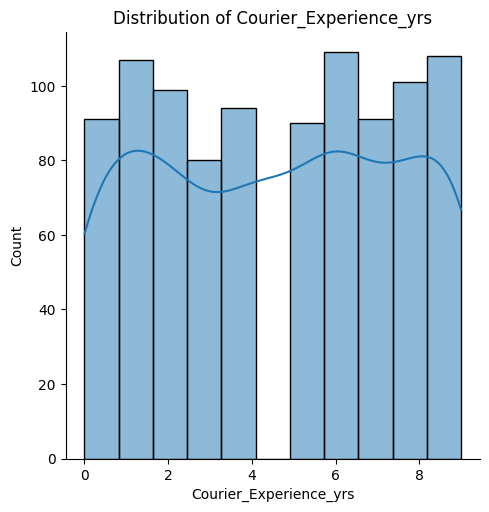

In [5]:
sns.displot(data['Courier_Experience_yrs'], kde=True)
plt.title("Distribution of Courier_Experience_yrs")
plt.show()

In [6]:
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])
data['Traffic_Level'] = data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Time_of_Day'] = data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])
data['Courier_Experience_yrs'] = data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean())

print(data.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


Encoding Categorical Features- using one-hot encoding

- Reason: It transforms categorical variables into binary features, signifying whether each category is present or absent. This approach aligns with the linear model's assumption of independent features and enables easy interpretation of the coefficients.

In [7]:
df = pd.DataFrame(data)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_features = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_features, columns=encoder.get_feature_names_out(categorical_columns))

encoded_df = pd.concat([df,one_hot_df],axis=1)
encoded_df = encoded_df.drop(categorical_columns, axis=1)
print(encoded_df.head())

   Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs   
0       522         7.93                    12                     1.0  \
1       738        16.42                    20                     2.0   
2       741         9.52                    28                     1.0   
3       661         7.44                     5                     1.0   
4       412        19.03                    16                     5.0   

   Delivery_Time_min  Weather_Clear  Weather_Foggy  Weather_Rainy   
0                 43            0.0            0.0            0.0  \
1                 84            1.0            0.0            0.0   
2                 59            0.0            1.0            0.0   
3                 37            0.0            0.0            1.0   
4                 68            1.0            0.0            0.0   

   Weather_Snowy  Weather_Windy  Traffic_Level_High  Traffic_Level_Low   
0            0.0            1.0                 0.0               

Visualizing Features

In [8]:
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Preparation_Time_min    1000 non-null   int64  
 3   Courier_Experience_yrs  1000 non-null   float64
 4   Delivery_Time_min       1000 non-null   int64  
 5   Weather_Clear           1000 non-null   float64
 6   Weather_Foggy           1000 non-null   float64
 7   Weather_Rainy           1000 non-null   float64
 8   Weather_Snowy           1000 non-null   float64
 9   Weather_Windy           1000 non-null   float64
 10  Traffic_Level_High      1000 non-null   float64
 11  Traffic_Level_Low       1000 non-null   float64
 12  Traffic_Level_Medium    1000 non-null   float64
 13  Time_of_Day_Afternoon   1000 non-null   float64
 14  Time_of_Day_Evening     1000 non-null   f

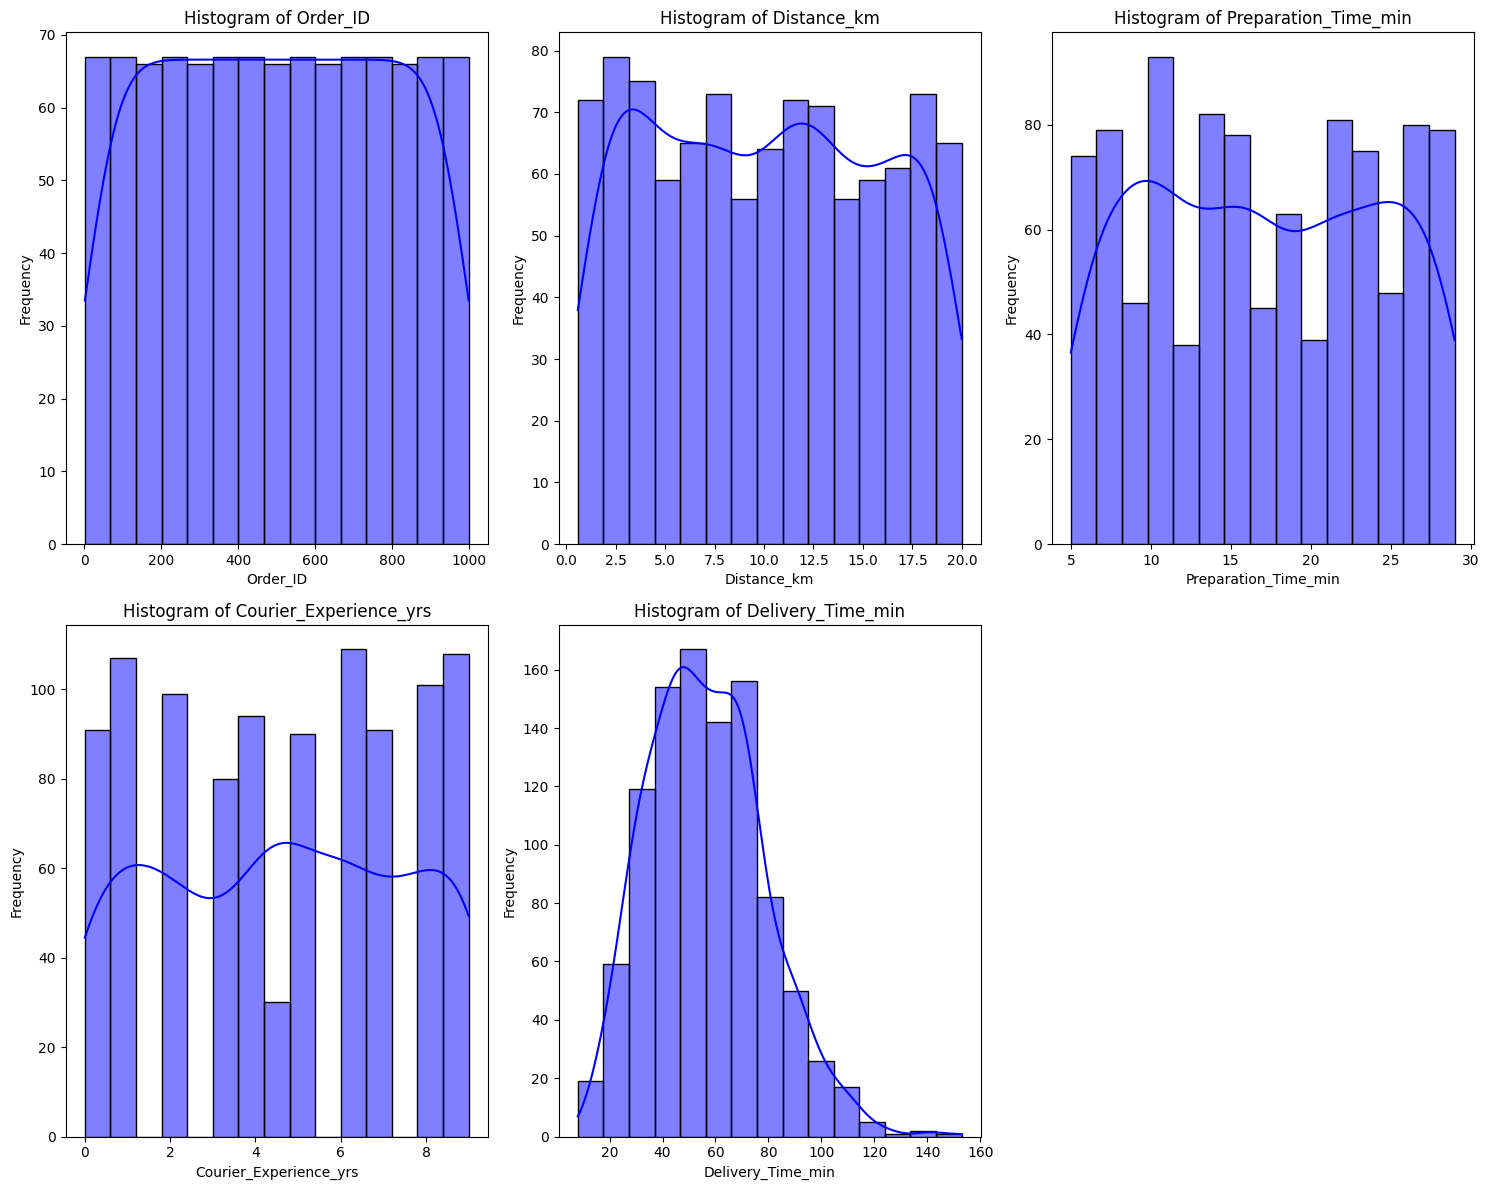

In [9]:
numerical_columns = encoded_df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns[:5], 1):  
    plt.subplot(2, 3, i)
    sns.histplot(encoded_df[column], kde=True, bins=15, color='blue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

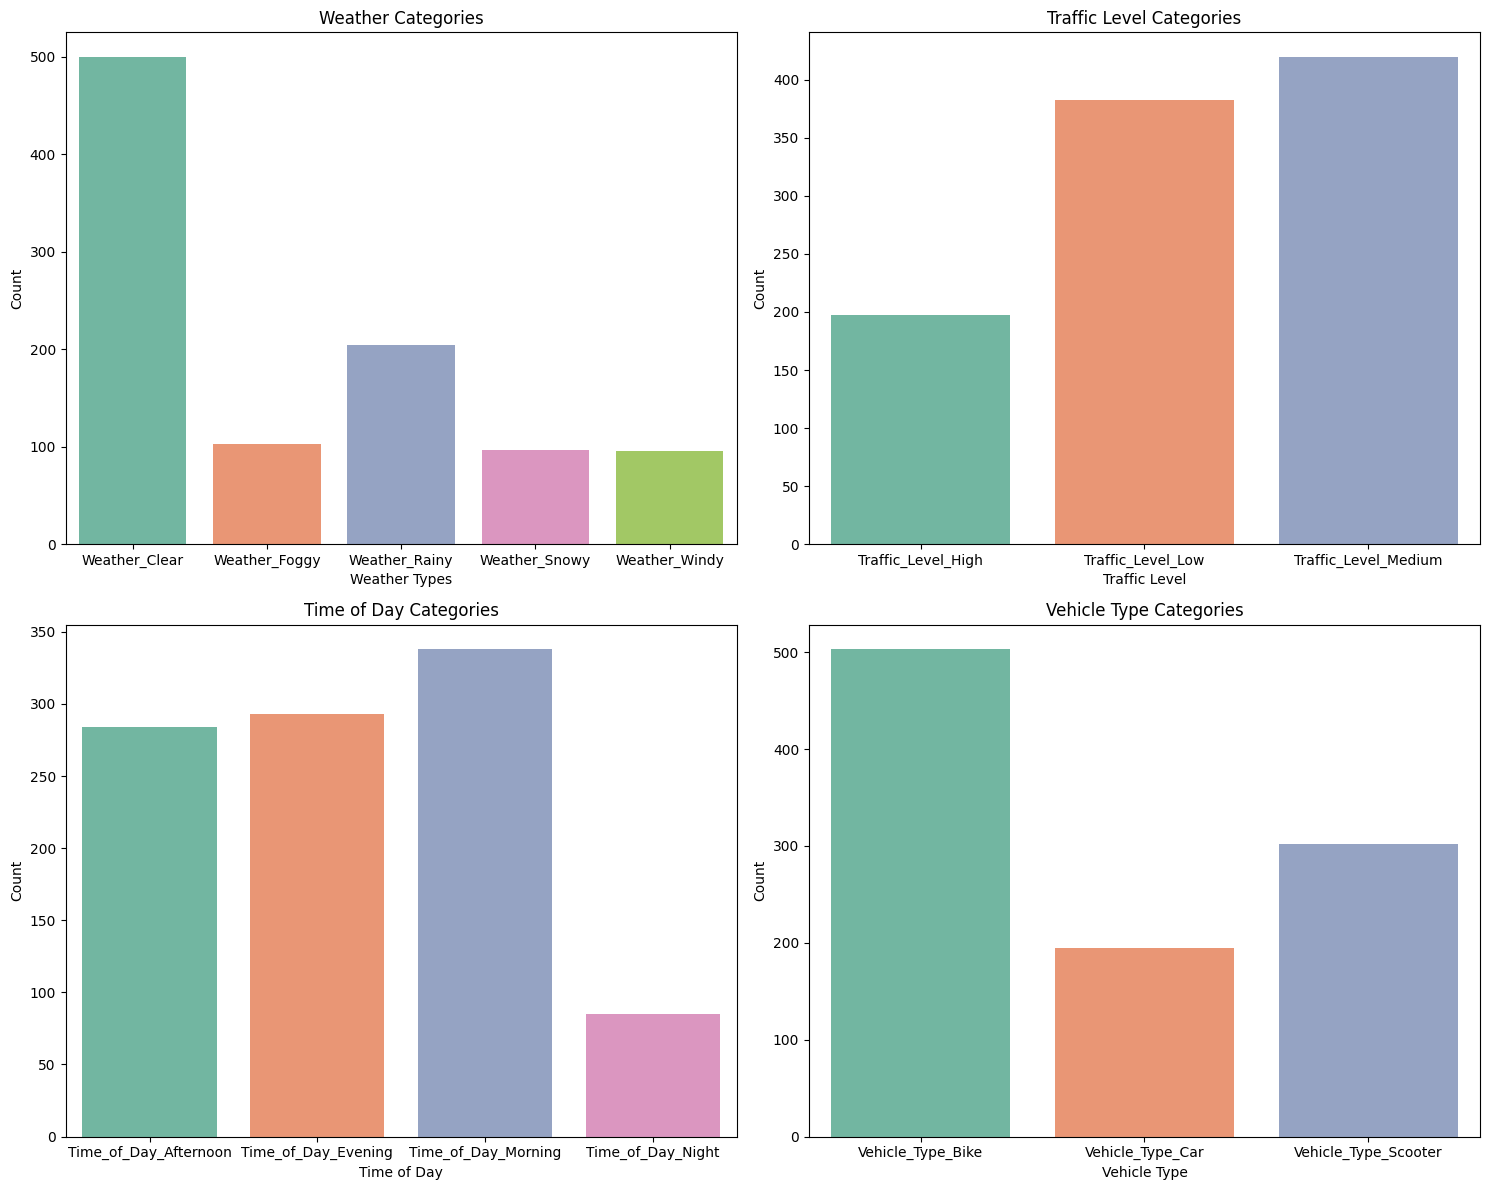

In [10]:

weather_columns = ['Weather_Clear', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy']
traffic_columns = ['Traffic_Level_High', 'Traffic_Level_Low', 'Traffic_Level_Medium']
time_of_day_columns = ['Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night']
vehicle_type_columns = ['Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter']

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)  
weather_data = encoded_df[weather_columns].sum()
sns.barplot(x=weather_data.index, y=weather_data.values, hue=weather_data.index, palette='Set2', legend=False)
plt.title('Weather Categories')
plt.xlabel('Weather Types')
plt.ylabel('Count')

plt.subplot(2, 2, 2)  
traffic_data = encoded_df[traffic_columns].sum()
sns.barplot(x=traffic_data.index, y=traffic_data.values, hue=traffic_data.index, palette='Set2', legend=False)
plt.title('Traffic Level Categories')
plt.xlabel('Traffic Level')
plt.ylabel('Count')

plt.subplot(2, 2, 3) 
time_of_day_data = encoded_df[time_of_day_columns].sum()
sns.barplot(x=time_of_day_data.index, y=time_of_day_data.values, hue=time_of_day_data.index, palette='Set2', legend=False)
plt.title('Time of Day Categories')
plt.xlabel('Time of Day')
plt.ylabel('Count')

plt.subplot(2, 2, 4)  
vehicle_type_data = encoded_df[vehicle_type_columns].sum()
sns.barplot(x=vehicle_type_data.index, y=vehicle_type_data.values, hue=vehicle_type_data.index, palette='Set2', legend=False)
plt.title('Vehicle Type Categories')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Train - Validation - Test

In [23]:
order_ids = encoded_df['Order_ID']
X = encoded_df.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y = encoded_df['Delivery_Time_min']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (700, 18)
X_val shape: (150, 18)
X_test shape: (150, 18)
y_train shape: (700,)
y_val shape: (150,)
y_test shape: (150,)


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Preparation_Time_min    1000 non-null   int64  
 2   Courier_Experience_yrs  1000 non-null   float64
 3   Weather_Clear           1000 non-null   float64
 4   Weather_Foggy           1000 non-null   float64
 5   Weather_Rainy           1000 non-null   float64
 6   Weather_Snowy           1000 non-null   float64
 7   Weather_Windy           1000 non-null   float64
 8   Traffic_Level_High      1000 non-null   float64
 9   Traffic_Level_Low       1000 non-null   float64
 10  Traffic_Level_Medium    1000 non-null   float64
 11  Time_of_Day_Afternoon   1000 non-null   float64
 12  Time_of_Day_Evening     1000 non-null   float64
 13  Time_of_Day_Morning     1000 non-null   float64
 14  Time_of_Day_Night       1000 non-null   f

Scaling the Features

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (700, 18)
X_val_scaled shape: (150, 18)
X_test_scaled shape: (150, 18)


# 2.2 Linear Regression with Gradient Descent

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class BatchGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.train_loss_history = []  
        self.val_loss_history = [] 

    def train(self, X_train, y_train, X_val, y_val):
        m = X_train.shape[0]
        n = X_train.shape[1]

        self.weights = np.zeros(n)
        self.bias = 0
        
        for i in range(self.n_iterations):

            y_train_pred = np.dot(X_train, self.weights) + self.bias
            train_loss = np.mean((y_train_pred - y_train) ** 2)
            self.train_loss_history.append(train_loss)

            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss = np.mean((y_val_pred - y_val) ** 2)
            self.val_loss_history.append(val_loss)

            dw = (2/m) * np.dot(X_train.T, (y_train_pred - y_train))
            db = (2/m) * np.sum(y_train_pred - y_train)
  
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if (i + 1) % 10 == 0:
                print(f"Iteration {i+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iterations), self.train_loss_history, label='Training Loss', color='blue')
        plt.plot(range(self.n_iterations), self.val_loss_history, label='Validation Loss', color='red')
        plt.xlabel('Iterations')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss Function vs. Iterations for BGD')
        plt.legend()
        plt.grid(True)
        plt.show()

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2

Iteration 10, Train Loss: 2649.1985, Validation Loss: 2639.3990
Iteration 20, Train Loss: 1807.1392, Validation Loss: 1809.7955
Iteration 30, Train Loss: 1246.1251, Validation Loss: 1253.1230
Iteration 40, Train Loss: 872.0801, Validation Loss: 879.2997
Iteration 50, Train Loss: 622.5431, Validation Loss: 628.0500
Iteration 60, Train Loss: 455.9865, Validation Loss: 459.0175
Iteration 70, Train Loss: 344.7700, Validation Loss: 345.1680
Iteration 80, Train Loss: 270.4801, Validation Loss: 268.3826
Iteration 90, Train Loss: 220.8412, Validation Loss: 216.5117
Iteration 100, Train Loss: 187.6648, Validation Loss: 181.4040
Iteration 110, Train Loss: 165.4860, Validation Loss: 157.5876
Iteration 120, Train Loss: 150.6560, Validation Loss: 141.3871
Iteration 130, Train Loss: 140.7379, Validation Loss: 130.3314
Iteration 140, Train Loss: 134.1037, Validation Loss: 122.7580
Iteration 150, Train Loss: 129.6653, Validation Loss: 117.5467
Iteration 160, Train Loss: 126.6955, Validation Loss: 113.

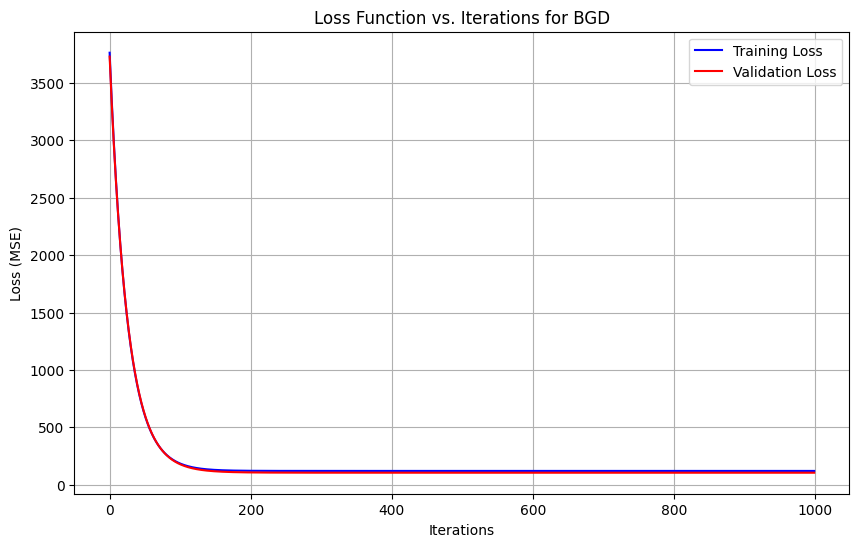

Test MSE: 62.751062, Test R²: 0.848866


In [47]:
model = BatchGradientDescent(learning_rate=0.01, n_iterations=1000)
model.train(X_train_scaled, y_train, X_val_scaled, y_val)
model.plot_loss()

mse, r2 = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse:f}, Test R²: {r2:f}")

**Mini-Batch Gradient Descent**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class MiniBatchGradientDescent:
    
    def __init__(self, batch_size, learning_rate=0.01, n_iterations=100):

        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
        self.loss_history = []  
        self.val_loss_history = []  

    def train(self, X_train, y_train, X_val, y_val):
        if isinstance(X_train, np.ndarray) is False:
            X_train = X_train.to_numpy()
        if isinstance(y_train, np.ndarray) is False:
            y_train = y_train.to_numpy()

        self.bias = 0
        self.weights = np.ones(X_train.shape[1])

        for i in range(self.n_iterations):

            for j in range(int(X_train.shape[0] / self.batch_size)):
                idx = random.sample(range(X_train.shape[0]), self.batch_size)
                X_batch = X_train[idx]
                y_batch = y_train[idx]
                
                y_hat = np.dot(X_batch, self.weights) + self.bias
                
                db = -2 * np.mean(y_batch - y_hat)
                dw = -2 * np.dot((y_batch - y_hat), X_batch)
                
                self.bias -= self.learning_rate * db
                self.weights -= self.learning_rate * dw

            train_loss = mean_squared_error(y_train, self.predict(X_train))
            self.loss_history.append(train_loss)
            if X_val is not None and y_val is not None and i % 10 == 0:
                val_loss = mean_squared_error(y_val, self.predict(X_val))
                self.val_loss_history.append(val_loss)

            if i % 10 == 0:
                print(f"Iteration {i + 1}/{self.n_iterations}, Train Loss: {train_loss}, Validation Loss: {val_loss if X_val is not None else 'N/A'}")
    
    def final_weight(self):
        return self.weights
    
    def predict(self, X_test):
        return np.dot(X_test, self.weights) + self.bias

    def plot_loss(self):
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, label='Training Loss ',color='blue')
        if self.val_loss_history:
            plt.plot(range(10, len(self.val_loss_history) * 10 + 1, 10), self.val_loss_history, label='Validation Loss ',color='red')
        
        plt.xlabel('Iterations')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs. Iterations for MBGD')
        plt.legend()
        plt.grid(True)
        plt.show()

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2


Iteration 1/500, Train Loss: 831.5146216657723, Validation Loss: 907.0264824061821
Iteration 11/500, Train Loss: 143.69759675536864, Validation Loss: 117.17014123697008
Iteration 21/500, Train Loss: 176.4717732586412, Validation Loss: 176.21461539798847
Iteration 31/500, Train Loss: 150.85491031822536, Validation Loss: 126.58797285809926
Iteration 41/500, Train Loss: 143.3568013692248, Validation Loss: 124.82968100620795
Iteration 51/500, Train Loss: 146.25971990858105, Validation Loss: 124.00421538544933
Iteration 61/500, Train Loss: 170.05808484645422, Validation Loss: 150.97069974945583
Iteration 71/500, Train Loss: 152.13319368372922, Validation Loss: 124.42269322446089
Iteration 81/500, Train Loss: 137.83868498213008, Validation Loss: 111.17132096391408
Iteration 91/500, Train Loss: 143.71108044505644, Validation Loss: 122.63583116331876
Iteration 101/500, Train Loss: 136.9110402018189, Validation Loss: 110.06643059000923
Iteration 111/500, Train Loss: 185.05639484201058, Validati

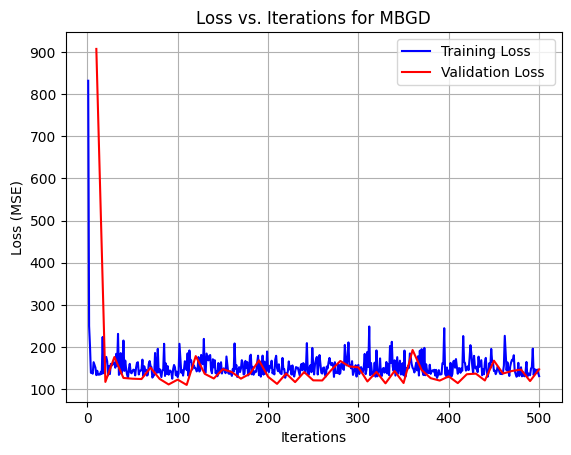

Test MSE: 66.25576836393387, Test R²: 0.8404250649228378


In [72]:
model = MiniBatchGradientDescent(batch_size=15, learning_rate=0.01, n_iterations=500)
model.train(X_train_scaled, y_train, X_val_scaled,y_val)
model.plot_loss()
final_weights = model.final_weight()
mse, r2 = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse}, Test R²: {r2}")


In [73]:
model = MiniBatchGradientDescent(batch_size=15, learning_rate=0.01, n_iterations=500)
model.train(X_train_scaled, y_train, X_val_scaled,y_val)
final_weights = model.final_weight()
print(f"Final weights: {final_weights}")

Iteration 1/500, Train Loss: 894.6845496684795, Validation Loss: 1121.8939917403677
Iteration 11/500, Train Loss: 135.49621154739938, Validation Loss: 116.91831837324906
Iteration 21/500, Train Loss: 153.5953874746404, Validation Loss: 150.53280023004905
Iteration 31/500, Train Loss: 148.75083570046183, Validation Loss: 125.26156001775945
Iteration 41/500, Train Loss: 144.01743227463038, Validation Loss: 115.27536140267361
Iteration 51/500, Train Loss: 201.59616346120075, Validation Loss: 178.80061718766817
Iteration 61/500, Train Loss: 151.12565027459735, Validation Loss: 150.95395125528935
Iteration 71/500, Train Loss: 149.21363243782304, Validation Loss: 132.72227691197335
Iteration 81/500, Train Loss: 133.53854785188295, Validation Loss: 114.4760588257604
Iteration 91/500, Train Loss: 157.52070349925097, Validation Loss: 141.50073140968274
Iteration 101/500, Train Loss: 164.61638771194066, Validation Loss: 160.7791010366011
Iteration 111/500, Train Loss: 199.27282040630368, Validat

**Stochastic Gradient Descent**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.train_loss_history = []
        self.val_loss_history = []

    def train(self, X_train, y_train, X_val=None, y_val=None):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        m, n = X_train.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.n_iterations):
            perm = np.random.permutation(m)
            X_train_shuffled = X_train[perm]
            y_train_shuffled = y_train[perm]

            for j in range(m):
                X_point = X_train_shuffled[j].reshape(1, -1)
                y_point = y_train_shuffled[j]

                y_pred = np.dot(X_point, self.weights) + self.bias

                dw = 2 * np.dot(X_point.T, (y_pred - y_point))
                db = 2 * (y_pred - y_point)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_train_pred = np.dot(X_train, self.weights) + self.bias
            train_loss = np.mean((y_train_pred - y_train) ** 2)
            self.train_loss_history.append(train_loss)

            if X_val is not None and y_val is not None:
                y_val_pred = np.dot(X_val, self.weights) + self.bias
                val_loss = np.mean((y_val_pred - y_val) ** 2)
                self.val_loss_history.append(val_loss)

            if epoch % 10 == 0:
                if X_val is not None and y_val is not None:
                    print(f"Iteration {epoch}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
                else:
                    print(f"Iteration {epoch}: Train Loss: {train_loss:.4f}")

    def predict(self, X_test):
        return np.dot(X_test, self.weights) + self.bias

    def plot_loss(self):
        plt.plot(self.train_loss_history, label="Training Loss",color='blue')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label="Validation Loss",color='red')
        plt.xlabel('Iterations')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs. Iterations for SGD')
        plt.legend()
        plt.grid(True)
        plt.show()

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2


Iteration 0: Train Loss: 139.3779, Validation Loss: 117.5584
Iteration 10: Train Loss: 135.4541, Validation Loss: 114.6388
Iteration 20: Train Loss: 144.4640, Validation Loss: 115.4900
Iteration 30: Train Loss: 138.0067, Validation Loss: 106.4426
Iteration 40: Train Loss: 131.2820, Validation Loss: 122.3888
Iteration 50: Train Loss: 137.6188, Validation Loss: 112.6948
Iteration 60: Train Loss: 154.0028, Validation Loss: 163.5459
Iteration 70: Train Loss: 133.0112, Validation Loss: 116.6108
Iteration 80: Train Loss: 132.9397, Validation Loss: 117.8428
Iteration 90: Train Loss: 127.8751, Validation Loss: 111.5259
Iteration 100: Train Loss: 141.1941, Validation Loss: 136.4044
Iteration 110: Train Loss: 128.1931, Validation Loss: 111.1976
Iteration 120: Train Loss: 151.6091, Validation Loss: 123.8254
Iteration 130: Train Loss: 133.1232, Validation Loss: 117.7138
Iteration 140: Train Loss: 130.0119, Validation Loss: 113.9916
Iteration 150: Train Loss: 137.1666, Validation Loss: 115.9713
Ite

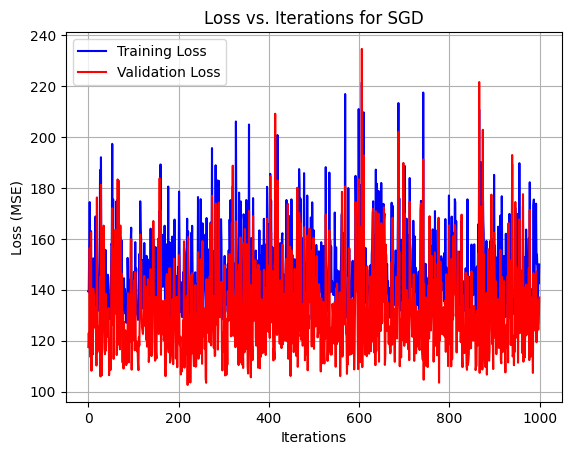

Test MSE: 86.70457762984714, Test R²: 0.7911747506997875


In [51]:
model = StochasticGradientDescent( learning_rate=0.01, n_iterations=1000)
model.train(X_train_scaled, y_train, X_val_scaled,y_val)
model.plot_loss()

mse, r2 = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse}, Test R²: {r2}")

# Regularization

**Ridge Regression**

In [4]:
class RidgeRegression:
    def __init__(self, learning_rate=0.01, n_iterations=100, lambda_=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.train_loss_history = []
        self.val_loss_history = []

    def train(self, X_train, y_train,  X_val=None, y_val=None):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        m, n = X_train.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.n_iterations):
            permutation = np.random.permutation(m)
            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train[permutation]

            for j in range(m):
                X_point = X_train_shuffled[j].reshape(1, -1)
                y_point = y_train_shuffled[j]

                y_pred = np.dot(X_point, self.weights) + self.bias

                dw = 2 * np.dot(X_point.T, (y_pred - y_point)) + 2 * self.lambda_ * self.weights
                db = 2 * (y_pred - y_point)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            y_train_pred = np.dot(X_train, self.weights) + self.bias
            train_loss = np.mean((y_train_pred - y_train) ** 2)
            self.train_loss_history.append(train_loss)

            if X_val is not None and y_val is not None:
                y_val_pred = np.dot(X_val, self.weights) + self.bias
                val_loss = np.mean((y_val_pred - y_val) ** 2)
                self.val_loss_history.append(val_loss)

    def final_weights(self):
        return self.weights       

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias
    
    def plot_loss(self):
        plt.plot(self.train_loss_history, label="Training Loss",color='blue')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label="Validation Loss",color='red')
        plt.xlabel('Iterations')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs. Iterations for SGD-Ridge')
        plt.legend()
        plt.grid(True)
        plt.show()

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2
        


Ridge Test MSE : 82.9599482460739, R²:0.8001935728425086


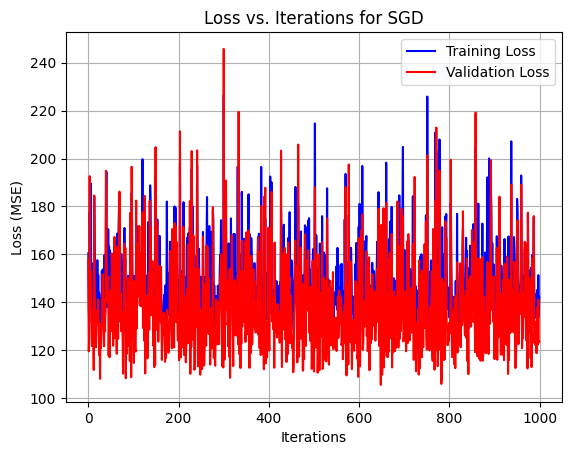

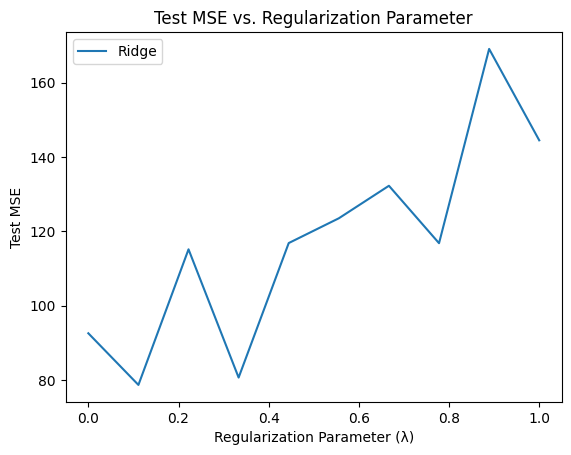

In [58]:
ridge_model = RidgeRegression(learning_rate=0.01, n_iterations=1000, lambda_=0.1)
ridge_model.train(X_train_scaled, y_train,X_val_scaled,y_val)
mse,r2 = ridge_model.evaluate(X_test_scaled, y_test)
print(f"Ridge Test MSE : {mse}, R²:{r2}")
ridge_model.plot_loss()

lambdas = np.linspace(0, 1, 10)
ridge_mse_values = []

for lambda_ in lambdas:
    ridge_model = RidgeRegression(learning_rate=0.01, n_iterations=20, lambda_=lambda_)
    ridge_model.train(X_train_scaled, y_train,X_val_scaled,y_val)
    mse, _ = ridge_model.evaluate(X_test_scaled, y_test)
    ridge_mse_values.append(mse)

plt.plot(lambdas, ridge_mse_values, label="Ridge")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Regularization Parameter")
plt.legend()
plt.show()

In [59]:
ridge_model = RidgeRegression(learning_rate=0.01, n_iterations=1000, lambda_=0.1)
ridge_model.train(X_train_scaled, y_train,X_val_scaled,y_val)
final_weight = ridge_model.final_weights()
print(f"Final weights: {final_weight}")

Final weights: [14.30927564  5.40591584 -1.7208564  -2.19595001 -0.02145005  2.49939384
  0.85771865 -0.62475744  1.72912345 -0.56274587 -0.80963141  1.66466518
 -0.58934551 -0.36080466 -1.08071977  0.5323752  -0.63081866 -0.02467247]


**LassoRegression**

In [ ]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, n_iterations=100, lambda_=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.train_loss_history = []
        self.val_loss_history = []

    def train(self, X_train, y_train,  X_val=None, y_val=None):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        m, n = X_train.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.n_iterations):
            perm = np.random.permutation(m)
            X_train_shuffled = X_train[perm]
            y_train_shuffled = y_train[perm]

            for j in range(m):
                X_point = X_train_shuffled[j].reshape(1, -1)
                y_point = y_train_shuffled[j]

                y_pred = np.dot(X_point, self.weights) + self.bias

                dw = 2 * np.dot(X_point.T, (y_pred - y_point)) + self.lambda_ * np.sign(self.weights)
                db = 2 * (y_pred - y_point)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            y_train_pred = np.dot(X_train, self.weights) + self.bias
            train_loss = np.mean((y_train_pred - y_train) ** 2)
            self.train_loss_history.append(train_loss)

            if X_val is not None and y_val is not None:
                y_val_pred = np.dot(X_val, self.weights) + self.bias
                val_loss = np.mean((y_val_pred - y_val) ** 2)
                self.val_loss_history.append(val_loss)

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias
    
    def final_weights(self):
        return self.weights

    def plot_loss(self):
        plt.plot(self.train_loss_history, label="Training Loss",color='blue')
        if self.val_loss_history:
            plt.plot(self.val_loss_history, label="Validation Loss",color='red')
        plt.xlabel('Iterations')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs. Iterations for SGD')
        plt.legend()
        plt.grid(True)
        plt.show()

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2


Lasso Test MSE : 77.67612390882776, R²:0.812919497639634


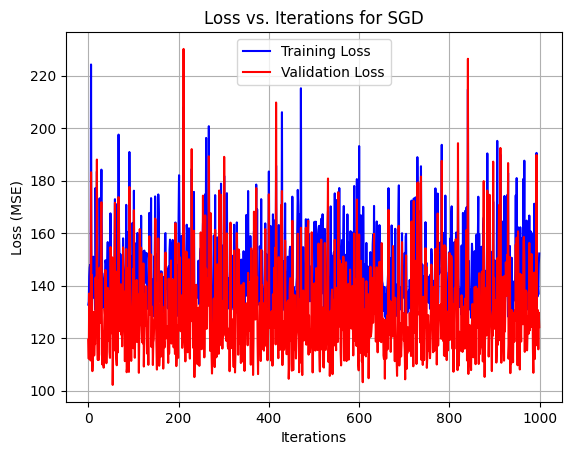

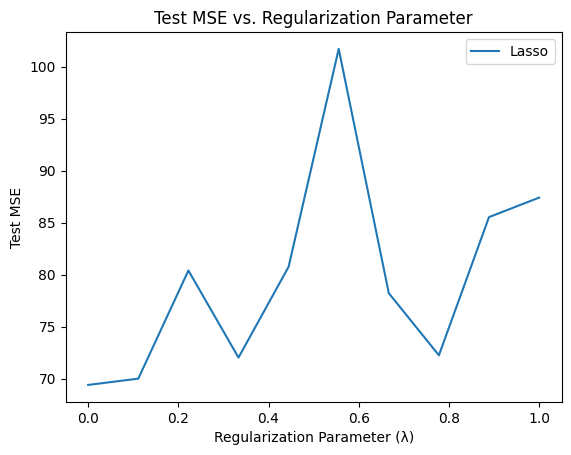

In [61]:
lasso_model = LassoRegression(learning_rate=0.01, n_iterations=1000, lambda_=0.1)
lasso_model.train(X_train_scaled, y_train,X_val_scaled,y_val)
lasso_test_mse,r2 = lasso_model.evaluate(X_test_scaled, y_test)
print(f"Lasso Test MSE : {lasso_test_mse}, R²:{r2}")
lasso_model.plot_loss()

lasso_mse_values = []
lambdas = np.linspace(0, 1, 10)

for lambda_ in lambdas:
    lasso_model = LassoRegression(learning_rate=0.01, n_iterations=20, lambda_=lambda_)
    lasso_model.train(X_train_scaled, y_train,X_val_scaled,y_val)
    mse, _ = lasso_model.evaluate(X_test_scaled, y_test)
    lasso_mse_values.append(mse)

plt.plot(lambdas, lasso_mse_values, label="Lasso")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Test MSE")
plt.title("Test MSE vs. Regularization Parameter")
plt.legend()
plt.show()

In [62]:
lasso_model = LassoRegression(learning_rate=0.01, n_iterations=1000, lambda_=0.1)
lasso_model.train(X_train_scaled, y_train,X_val_scaled,y_val)

final_wt = lasso_model.final_weights()
print(f"Final weights: {final_wt}")

Final weights: [ 1.82160021e+01  7.18398415e+00 -5.87787131e-01  4.08485956e-01
 -3.54023283e-01 -2.95269360e-01  8.49917295e-01 -1.01330975e+00
  1.88569794e+00 -1.79165738e+00 -7.50286961e-03  6.30150865e-01
  1.30909877e+00 -1.23928289e+00 -7.75003346e-01 -1.25894734e+00
  1.26461576e+00  3.65049922e-01]


# 2.4 Report

Iteration 1/500, Train Loss: 759.2459174254959, Validation Loss: 737.0929540330653
Iteration 11/500, Train Loss: 137.31570546434074, Validation Loss: 113.73784579432865
Iteration 21/500, Train Loss: 182.65309084498824, Validation Loss: 187.43756891115572
Iteration 31/500, Train Loss: 199.57883499807292, Validation Loss: 197.7378376252454
Iteration 41/500, Train Loss: 148.3489589487298, Validation Loss: 118.11067778994897
Iteration 51/500, Train Loss: 167.9547098378274, Validation Loss: 155.3282568513129
Iteration 61/500, Train Loss: 148.74121450136383, Validation Loss: 132.01165808945345
Iteration 71/500, Train Loss: 143.33802438754668, Validation Loss: 125.02293811886838
Iteration 81/500, Train Loss: 178.48180978082027, Validation Loss: 168.24680093891294
Iteration 91/500, Train Loss: 161.31631502061177, Validation Loss: 135.86495540479027
Iteration 101/500, Train Loss: 146.85296651191004, Validation Loss: 127.82252770568485
Iteration 111/500, Train Loss: 155.1472165473791, Validation

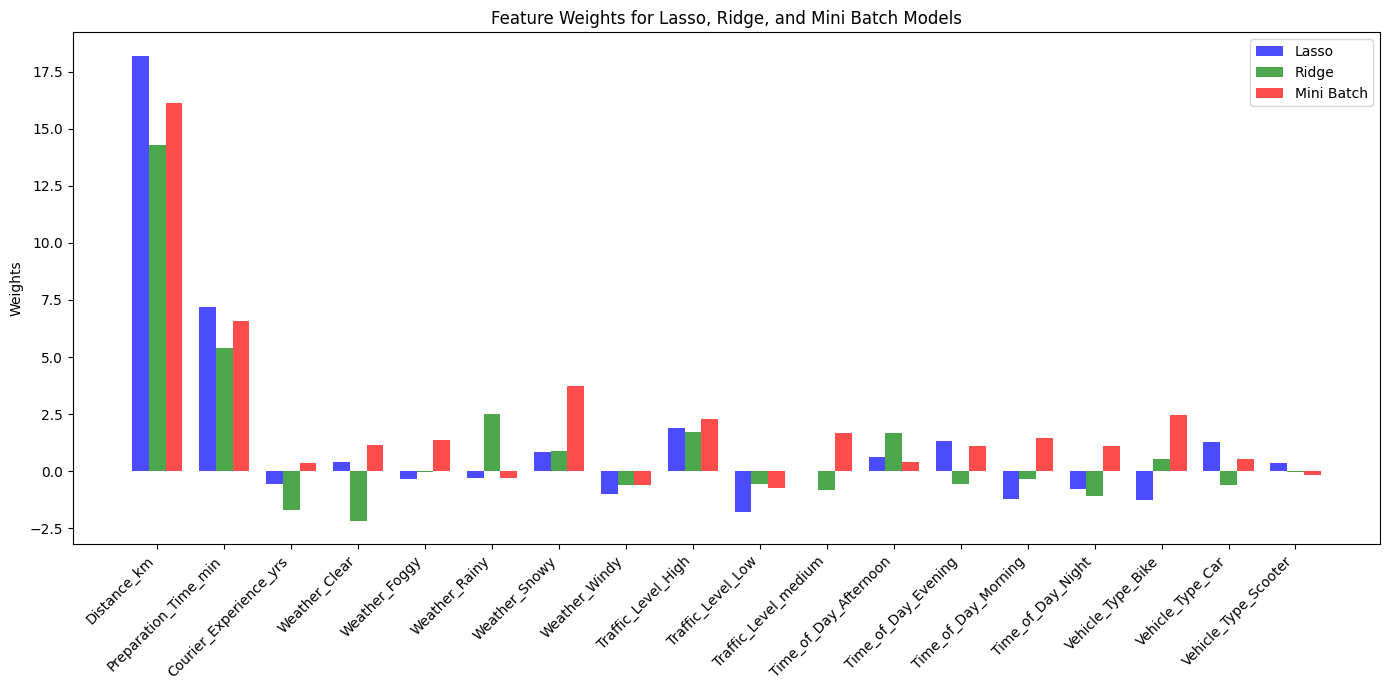

In [75]:
import matplotlib.pyplot as plt
import numpy as np

features = [
    'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs','Weather_Clear', 'Weather_Foggy', 'Weather_Rainy',
    'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_High', 'Traffic_Level_Low', 'Traffic_Level_medium',
    'Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
    'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter'
]

model = MiniBatchGradientDescent(batch_size=15, learning_rate=0.01, n_iterations=500)
model.train(X_train_scaled, y_train, X_val_scaled,y_val)

lasso_weights = lasso_model.final_weights()
ridge_weights = ridge_model.final_weights()
mini_batch_weights = model.final_weight()

x = np.arange(len(features))  
width = 0.25 

plt.figure(figsize=(14, 7))
plt.bar(x - width, lasso_weights, width, label='Lasso', color='b', alpha=0.7)
plt.bar(x, ridge_weights, width, label='Ridge', color='g', alpha=0.7)
plt.bar(x + width, mini_batch_weights, width, label='Mini Batch', color='r', alpha=0.7)

plt.xticks(x, features, rotation=45, ha='right')
plt.ylabel('Weights')
plt.title('Feature Weights for Lasso, Ridge, and Mini Batch Models')
plt.legend()
plt.tight_layout()

plt.show()
